In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gadded = pd.read_csv("/Users/dom05/Documents/Data Science Projects/Timbers Data Project/Data/american_soccer_analysis_mls_goals-added_players_2025-02-20.csv")
salaries = pd.read_csv("/Users/dom05/Documents/Data Science Projects/Timbers Data Project/Data/american_soccer_analysis_mls_salaries_players_2025-02-20.csv")
xg = pd.read_csv("/Users/dom05/Documents/Data Science Projects/Timbers Data Project/Data/american_soccer_analysis_mls_xgoals_players_2025-02-20.csv")
xpass = pd.read_csv("/Users/dom05/Documents/Data Science Projects/Timbers Data Project/Data/american_soccer_analysis_mls_xpass_players_2025-02-20.csv")

In [3]:
gadd_salaries = gadded.merge(salaries[['Player','Base Salary','Guaranteed Compensation']],on="Player").drop('Unnamed: 0',axis = 1)

In [4]:
ptfc_df = gadd_salaries[gadd_salaries['Team'] == 'POR']
ptfc_df['Base Salary Number'] = ptfc_df['Base Salary'].str.replace("$", "").str.replace(",", "").astype(int)
ptfc_df.columns

/var/folders/pn/v8c4s2w974s_4jhc608djs7h0000gn/T/ipykernel_10542/3874775441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ptfc_df['Base Salary Number'] = ptfc_df['Base Salary'].str.replace("$", "").str.replace(",", "").astype(int)


Index(['Player', 'Team', 'Season', 'Position', 'Minutes', 'Dribbling',
       'Fouling', 'Interrupting', 'Passing', 'Receiving', 'Shooting',
       'Goals Added', 'Base Salary', 'Guaranteed Compensation',
       'Base Salary Number'],
      dtype='object')

In [5]:
ptfc_df = ptfc_df.sort_values('Base Salary Number',ascending = True)


/var/folders/pn/v8c4s2w974s_4jhc608djs7h0000gn/T/ipykernel_10542/2341280444.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(ptfc_df['Base Salary Number'],ptfc_df['Goals Added'],'ro',color = 'darkgreen')


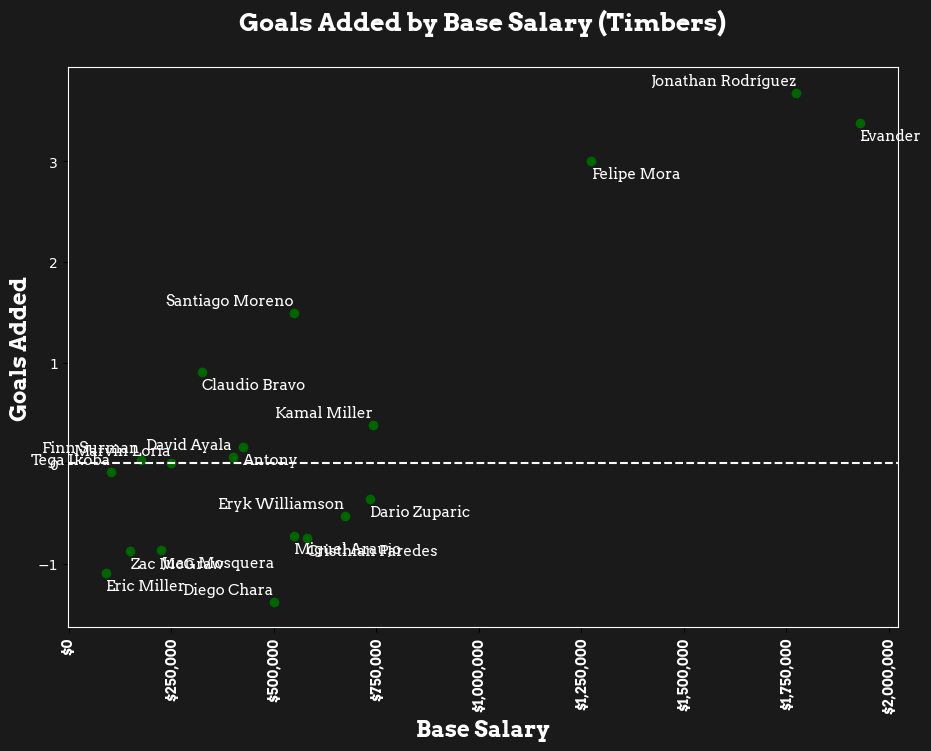

In [36]:
import matplotlib.font_manager as font_manager
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker

# Load font
font_path = 'Fonts/Arvo-Bold.ttf'
font_props = font_manager.FontProperties(fname=font_path)

# Create figure
fig, ax = plt.subplots(figsize=(10, 8))  # Bigger canvas
fig.subplots_adjust(left=0.1, right=0.93, top=0.9, bottom=0.2)  # Adjust margins

# Set background
fig.patch.set_facecolor('#1a1a1a')  
ax.set_facecolor('#1a1a1a')


plt.plot(ptfc_df['Base Salary Number'],ptfc_df['Goals Added'],'ro',color = 'darkgreen')

# Add labels for each point
# Add labels for each point with slight offset
for i in range(len(ptfc_df)):
    plt.text(
        ptfc_df.iloc[i]['Base Salary Number'] + (0.05 if i % 2 == 1 else -0.05), 
        ptfc_df.iloc[i]['Goals Added'] + (0.05 if i % 2 == 1 else -0.05),   # Offset y by 0.05
        ptfc_df.iloc[i]['Player'],
        fontsize=11,
        ha='right' if i % 2 == 1 else 'left',
        va='bottom' if i % 2 == 1 else 'top',
        fontproperties = font_manager.FontProperties(fname='Fonts/Arvo-Regular.ttf'),
        color = 'white'
    )

plt.axhline(y=0, color='white', linestyle='--', linewidth=1.5)

# Formatting
plt.xlabel('Base Salary', color='white', fontproperties=font_props,size = 16)
plt.ylabel('Goals Added', color='white', fontproperties=font_props,size = 16)
plt.xticks(rotation=90, color='white',fontproperties = font_props)
# Format the x-axis to display full numbers (instead of scientific notation)
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"${x:,.0f}"))  # Format as currency with commas

plt.yticks(color='white')

plt.title('Goals Added by Base Salary (Timbers)\n',color = 'white',
          fontproperties = font_props,size = 18)

# Change axis colors to white
ax.spines['bottom'].set_color('white')  # Bottom border
ax.spines['top'].set_color('white')     # Top border
ax.spines['right'].set_color('white')   # Right border
ax.spines['left'].set_color('white')    # Left border



plt.savefig('timbers_salary_gadd.png',dpi = 700)
